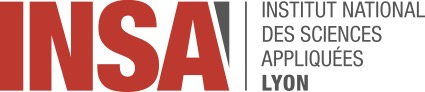
# P2I7: Chapitre 5 méthodes numériques
## Convergence des schémas numériques pour les EDOs
Camille Carvalho (INSA/ICJ)

In [1]:
#libraries to import
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

On regarde toujours le système de masses de la séance précédente 

$$ \ddot{U}(t) + KU(t) = 0, $$
avec 
$$ K = \begin{bmatrix}
 2 & -1 & 0 & 0 & 0 \\
 -1 & 2 & -1 & 0 & 0 \\
 0 & -1 & 2 & -1 & 0 \\
 0 & 0 & -1 & 2 & -1 \\
 0 & 0 & 0 & -1 & 2
\end{bmatrix}, \quad \quad U(t) = \begin{pmatrix} {u_1(t)} \\ {u_2(t)} \\ {u_3(t)}\\ {u_4(t)}\\{u_5(t)} \end{pmatrix} $$
Pour pouvoir estimer la convergence des schémas numériques sur ce problème, nous allons calculer la solution de ce problème à la main. Pour cela, remarquons que les valeurs propres de la matrice $K$ sont $\lambda_1 = 1, \lambda_2 = 2, \lambda_3 = 3, \lambda_4 = 2-\sqrt{3}, \lambda_5 = 2+\sqrt{3}$ et les vecteurs propres correspondants
$$ 
W_1 = \begin{pmatrix} 1 \\ 1 \\ 0\\ -1\\-1 \end{pmatrix}, \quad  
W_2 = \begin{pmatrix} 1 \\ 0 \\ -1\\ 0\\1 \end{pmatrix}, \quad
W_3 = \begin{pmatrix} -1 \\ 1 \\ 0\\ -1\\1 \end{pmatrix}, \quad
W_4 = \begin{pmatrix} 1 \\ \sqrt{3} \\ 2\\ \sqrt{3}\\1 \end{pmatrix}, \quad
W_5 = \begin{pmatrix} 1 \\ -\sqrt{3} \\ 2\\ \sqrt{3}\\1 \end{pmatrix}.
$$
Si on développe la solution sur les vecteurs propres en écrivant
$$ U(t) = \sum_{i=1}^5 \beta_i(t) W_i, $$
alors chaque composante $\beta_i(t)$ vérifie
$$ \ddot{\beta}_i(t) + \lambda_i \beta_i(t) = 0. $$
Et l'on trouve donc
$$ \beta_i(t) = c_i \sin(\sqrt{\lambda_i} t) + d_i \cos(\sqrt{\lambda_i} t), $$
où les $c_i$ et $d_i$ sont déterminés par la condition initiale. La condition initiale
$$ u_1(0) = 1, ~~u_2(0) = 0.9\sqrt{3}, ~~u_3(0) = 2, ~~u_4(0) = 0.9\sqrt{3}, ~~u_5(0) = 1, $$
$$ \dot{u}_1(0) = \dot{u}_2(0) = \dot{u}_3(0) = \dot{u}_4(0) =  \dot{u}_5(0) = 0. $$
correspond à $d_4 = 0.95$ et $d_5 = 0.05$ et tous les autres coefficients nuls. La solution s'écrit donc
$$ U(t) = 0.95\cos(\sqrt{\lambda_4}t)W_4 +  0.05\cos(\sqrt{\lambda_5}t)W_5. $$

**Question 1.** Ajoutez dans votre programme de la séance précédente une partie qui calcule la solution exacte à chaque pas de temps et la différence en norme euclidienne avec la solution approchée. Calculer le maximum de cette différence sur tous les pas de temps. 

**Question 2.** Pour un temps de simulation $T=10$, notez l'évolution de cette erreur maximale en fonction du pas de temps pour la méthode d'Euler implicite (vous pourrez prendre les valeurs de $\Delta t$ suivantes : 1/2, 1/4, 1/8, 1/16, 1/32, 1/64). Faites un graphique en échelle logarithmique (voir la commande ``loglog`` de matplotlib) de cette évolution. Quelle est la pente approximative de la courbe obtenue ?

**Question 3.** Refaites cette expérience pour la méthode d'Euler explicite et la méthode de Crank-Nicolson.

**Question 4.** Implémentez le schéma de Verlet et le schéma RK4 et comparez. Quelles sont les conditions de stabilité pour ces deux schémas ? (a-stabilité pour RK4).

**Question 5.** Faites une simulation avec un $T$ grand et un pas de temps assez grand ($T = 40$, $\Delta t$ = 1/2, par exemple) en dessinant l'évolution de l'énergie. Commentez et comparez aux valeurs théoriques de stabilité.